In [1]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "D:/spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [2]:
# The usual preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

C:\Users\agungteguh\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
na_values = ['NO CLUE', 'N/A', '0','']
request = pd.read_csv('gem.csv',na_values=na_values)

In [5]:

req = (request.drop('NA_Sales', axis=1)
         .join(request['NA_Sales'].apply(pd.to_numeric, errors='coerce')))

req2 = (req.drop('EU_Sales', axis=1)
         .join(req['EU_Sales'].apply(pd.to_numeric, errors='coerce')))

req3 = (req2.drop('JP_Sales', axis=1)
         .join(req['JP_Sales'].apply(pd.to_numeric, errors='coerce')))

req4 = (req3.drop('Other_Sales', axis=1)
         .join(req['Other_Sales'].apply(pd.to_numeric, errors='coerce')))

In [7]:
reqcopy = req4[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].copy()
reqany = reqcopy.dropna(how='any')

In [8]:
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.sql import SQLContext
sqlcontext = SQLContext(sc)
datacleansing = sqlcontext.createDataFrame(reqany)
datacleansing.take(50)

[Row(NA_Sales=41.36, EU_Sales=28.96, JP_Sales=3.77, Other_Sales=8.45),
 Row(NA_Sales=29.08, EU_Sales=3.58, JP_Sales=6.81, Other_Sales=0.77),
 Row(NA_Sales=15.68, EU_Sales=12.76, JP_Sales=3.79, Other_Sales=3.29),
 Row(NA_Sales=15.61, EU_Sales=10.93, JP_Sales=3.28, Other_Sales=2.95),
 Row(NA_Sales=11.27, EU_Sales=8.89, JP_Sales=10.22, Other_Sales=1.0),
 Row(NA_Sales=23.2, EU_Sales=2.26, JP_Sales=4.22, Other_Sales=0.58),
 Row(NA_Sales=11.28, EU_Sales=9.14, JP_Sales=6.5, Other_Sales=2.88),
 Row(NA_Sales=13.96, EU_Sales=9.18, JP_Sales=2.93, Other_Sales=2.84),
 Row(NA_Sales=14.44, EU_Sales=6.94, JP_Sales=4.7, Other_Sales=2.24),
 Row(NA_Sales=26.93, EU_Sales=0.63, JP_Sales=0.28, Other_Sales=0.47),
 Row(NA_Sales=9.05, EU_Sales=10.95, JP_Sales=1.93, Other_Sales=2.74),
 Row(NA_Sales=9.71, EU_Sales=7.47, JP_Sales=4.13, Other_Sales=1.9),
 Row(NA_Sales=9.0, EU_Sales=6.18, JP_Sales=7.2, Other_Sales=0.71),
 Row(NA_Sales=8.92, EU_Sales=8.03, JP_Sales=3.6, Other_Sales=2.15),
 Row(NA_Sales=15.0, EU_Sale

In [10]:
rdd = datacleansing.rdd
result = rdd.map(lambda line: array([x for x in line]))

In [11]:
result.collect()

[array([ 41.36,  28.96,   3.77,   8.45]),
 array([ 29.08,   3.58,   6.81,   0.77]),
 array([ 15.68,  12.76,   3.79,   3.29]),
 array([ 15.61,  10.93,   3.28,   2.95]),
 array([ 11.27,   8.89,  10.22,   1.  ]),
 array([ 23.2 ,   2.26,   4.22,   0.58]),
 array([ 11.28,   9.14,   6.5 ,   2.88]),
 array([ 13.96,   9.18,   2.93,   2.84]),
 array([ 14.44,   6.94,   4.7 ,   2.24]),
 array([ 26.93,   0.63,   0.28,   0.47]),
 array([  9.05,  10.95,   1.93,   2.74]),
 array([ 9.71,  7.47,  4.13,  1.9 ]),
 array([ 9.  ,  6.18,  7.2 ,  0.71]),
 array([ 8.92,  8.03,  3.6 ,  2.15]),
 array([ 15.  ,   4.89,   0.24,   1.69]),
 array([ 9.01,  8.49,  2.53,  1.77]),
 array([ 7.02,  9.09,  0.98,  3.96]),
 array([  9.43,   0.4 ,   0.41,  10.57]),
 array([ 12.78,   3.75,   3.54,   0.55]),
 array([ 4.74,  9.2 ,  4.16,  2.04]),
 array([ 6.38,  4.46,  6.04,  1.36]),
 array([ 10.83,   2.71,   4.18,   0.42]),
 array([ 9.54,  3.44,  3.84,  0.46]),
 array([ 9.66,  5.14,  0.06,  1.41]),
 array([ 8.41,  5.49,  0.47,

In [12]:
result.count()

2393

In [21]:
datacluster = KMeans.train(result, 3, maxIterations=1000, initializationMode="random")

In [22]:
predictdata = result.map(datacluster.predict)
X = result.collect()
label = predictdata.collect()

[array([ 3.62740741,  2.24962963,  0.93027778,  0.73615741]), array([ 15.95055556,   8.09666667,   4.10277778,   2.07777778]), array([ 0.50083835,  0.33993516,  0.21092172,  0.10951366])]


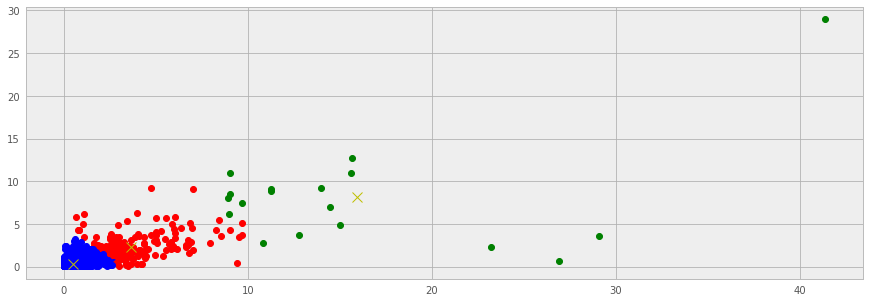

In [23]:
import numpy as np
import matplotlib.pyplot as plt


for point in range(len(label)):
    if (label[point]==0):
        color = "r";
    elif (label[point]==1):
        color = "g";
    elif (label[point]==2):
        color = "b";
    lines = plt.plot(X[point][0], X[point][1] ,'ro')
    plt.setp(lines, color=color, linewidth=2.0)
    center =datacluster.clusterCenters
print center
for centroid in range(len(center)):
    lines = plt.plot(center[centroid][0],center[centroid][1],'bx')
    plt.setp(lines, color="y", markersize=10)
plt.show()